# Data reading and preprocessing

In [68]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [ ]:
#from google.colab import drive as drive1
#drive1.mount("/content/drive")

In [69]:
category_df = pd.read_csv('업종분류.csv',engine='python')
code_list = category_df.iloc[7].values[1:]
name_list = category_df.iloc[8].values[1:]
cate_list = category_df.iloc[13].values[1:]
category_df = pd.DataFrame()
category_df['code'] = code_list
category_df['name'] = name_list
category_df['category'] = cate_list
category_df['category'] = category_df['category'].apply(lambda x: str(x).replace(' ',''))
fin_company_list = category_df[category_df['category'].str.contains('금융')]['code'].unique()

In [70]:
fundamental_df = pd.read_csv('fundamental data 1999_2015.csv',engine = 'python').drop([0,1,2,3,4,5,6,8,9,10,12]).copy()
stock_code = pd.DataFrame(fundamental_df.loc[7].values[1:].reshape(-1,1),columns= ['stock_code'])['stock_code'].unique()
temp_list=[]
for stock in stock_code:
    if stock in fin_company_list:
        pass
    else:
        temp_list.append(stock)
stock_code = temp_list
        
funda_code = pd.DataFrame(fundamental_df.loc[11].values[1:].reshape(-1,1),columns= ['funda_code'])['funda_code'].unique()
fundamental_df.columns = [fundamental_df.loc[7].values,fundamental_df.loc[11].values]
fundamental_df = fundamental_df.drop([7,11]).copy()
date_list = fundamental_df['Symbol']['Item Name'].unique()
fundamental_df = fundamental_df.set_index(fundamental_df['Symbol']['Item Name'].values)
fundamental_df = fundamental_df.drop('Symbol',axis = 1).copy()
fundamental_df.head()

A005930                                             \
                   총자산(천원)         총부채(천원) 시가총액 (티커-상장예정주식수 미포함)(백만원)   
1999-03-31  29,178,630,368  16,003,946,089                 12,649,438   
1999-06-30  29,178,630,368  16,003,946,089                 16,910,301   
1999-09-30  29,178,630,368  16,003,946,089                 29,395,965   
1999-12-31  29,178,630,368  16,003,946,089                 39,857,115   
2000-03-31  46,421,503,465  29,636,008,066                 50,353,737   

                                                                             \
                   총자본(천원) ROE(세전계속사업이익)(%)         매출액(천원)        매출원가(천원)   
1999-03-31  13,174,684,279            45.56  32,087,714,365  21,476,416,255   
1999-06-30  13,174,684,279            45.56  32,087,714,365  21,476,416,255   
1999-09-30  13,174,684,279            45.56  32,087,714,365  21,476,416,255   
1999-12-31  13,174,684,279            45.56  32,087,714,365  21,476,416,255   
2000-03-31  16,785,495,399            57.42  43,527,806,399  27,638,606,865   

                                                          ...       A193250  \
           연구개발비(총액)(천원) 매출채권의감소(증가)(천원) 재고자산의감소(증가)(천원)  ... 연구개발비(총액)(천원)   
1999-03-31           NaN      79,917,153    -475,512,306  ...           NaN   
1999-06-30           NaN      79,917,153    -475,512,306  ...           NaN   
1999-09-30           NaN      79,917,153    -475,512,306  ...           NaN   
1999-12-31           NaN      79,917,153    -475,512,306  ...           NaN   
2000-03-31           NaN      11,480,652    -488,361,559  ...           NaN   

                                                                            \
           매출채권의감소(증가)(천원) 재고자산의감소(증가)(천원) 선급비용의감소(증가)(천원) (할인차금및이연수익)(천원)   
1999-03-31             NaN             NaN             NaN             NaN   
1999-06-30             NaN             NaN             NaN             NaN   
1999-09-30             NaN             NaN             NaN             NaN   
1999-12-31             NaN             NaN             NaN             NaN   
2000-03-31             NaN             NaN             NaN             NaN   

                                                  A014280               \
           매입채무의증가(감소)(천원) 미지급비용의 증가(감소)(천원)      총자산(천원)      총부채(천원)   
1999-03-31             NaN               NaN  145,413,404  132,434,657   
1999-06-30             NaN               NaN  145,413,404  132,434,657   
1999-09-30             NaN               NaN  145,413,404  132,434,657   
1999-12-31             NaN               NaN  145,413,404  132,434,657   
2000-03-31             NaN               NaN  128,663,786  120,161,649   

                                       
           시가총액 (티커-상장예정주식수 미포함)(백만원)  
1999-03-31                      3,200  
1999-06-30                      7,010  
1999-09-30                      7,199  
1999-12-31                      3,852  
2000-03-31                      3,368  

[5 rows x 16383 columns]

In [71]:
#판매관리비 빼먹어서 따로
selling_df = pd.read_csv('판매관리비.csv',engine='python').drop([0,1,2,3,4,5,6,8,9,10,12]).copy()
selling_df.columns = [selling_df.loc[7].values,selling_df.loc[11].values]
selling_df = selling_df.drop([7,11]).copy()
selling_df = selling_df.set_index(selling_df['Symbol']['Item Name'].values)
selling_df = selling_df.drop('Symbol',axis = 1).copy()
selling_df.head()

,A005930,A000660,A005380,A068270,A051910,A055550,A005490,A017670,A207940,A051900,...,A900050,A900060,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100
,판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),...,판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원)
1999-03-31,"5,235,347,120","1,180,308,861","5,001,704,000",NaN,NaN,NaN,"685,662,486","4,134,671,434",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-06-30,"5,235,347,120","1,180,308,861","5,001,704,000",NaN,NaN,NaN,"685,662,486","4,134,671,434",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-09-30,"5,235,347,120","1,180,308,861","5,001,704,000",NaN,NaN,NaN,"685,662,486","4,134,671,434",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-31,"5,235,347,120","1,180,308,861","5,001,704,000",NaN,NaN,NaN,"685,662,486","4,134,671,434",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,"6,828,859,915","1,475,718,770","6,296,249,000",NaN,NaN,NaN,"718,103,201","5,927,597,054",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# # 각각의 계정과목에 대해 dict -> dataframe -> csv 던짐
- tobins'q  : book_asset, debt, market_equity(시총)
- COP(cash flow) : total_revenue, goods_sold, (selling,general and administrative expenses), r&d, accounts_receivable, change in inventory 
-- prepaid_expenses, deferred_revenue, trade_accounts, accrued_expenses
- ROE : ROE, book_equity
- 총자산(천원)
- 총부채(천원)
- 시가총액 (티커-상장예정주식수 미포함)(백만원)
- 총자본(천원)
- ROE(세전계속사업이익)(%)
- 매출액(천원)
- 매출원가(천원)
- 연구개발비(총액)(천원)
- 매출채권의감소(증가)(천원)
- 재고자산의감소(증가)(천원)
- 선급비용의감소(증가)(천원)
- (할인차금및이연수익)(천원)
- 매입채무의증가(감소)(천원)
- 미지급비용의 증가(감소)(천원)

In [72]:
##object type -> float type function
def formatting_values(x):
    if x == 'NaN':
        return np.nan

    elif type(x) != 'float':
        if ',' in x:
            return float(x.replace(',',''))
        elif '.' in x:
            return float(x)
        else:
            if x == 'nan':
                return np.nan
            
            elif x == 'N/A(IFRS)' or x == '완전잠식':
                return np.nan

            else:
                return float(x)
    else:
        return float(x)

In [73]:
book1= dict()
index_list = fundamental_df['A005930']['총자산(천원)'].index
for funda in funda_code:
    print(funda)
    funda_df = pd.DataFrame()
    for stock in stock_code[:-1]: ##'A014280' 이 놈은 총자본 항목이 없으므로 제외 총 1169개의 기업에 대해 
        temp = pd.DataFrame(fundamental_df[stock][funda].values,columns=[stock],index = index_list)
        funda_df = pd.concat([funda_df,temp],axis=1)
    
    for col in funda_df.columns:
        funda_df[col] = funda_df[col].astype('str')
        value_list = funda_df[col].apply(formatting_values)
        funda_df[col] = value_list
        
    book1[funda] = funda_df

총자산(천원)
총부채(천원)
시가총액 (티커-상장예정주식수 미포함)(백만원)
총자본(천원)
ROE(세전계속사업이익)(%)
매출액(천원)
매출원가(천원)
연구개발비(총액)(천원)
매출채권의감소(증가)(천원)
재고자산의감소(증가)(천원)
선급비용의감소(증가)(천원)
(할인차금및이연수익)(천원)
매입채무의증가(감소)(천원)
미지급비용의 증가(감소)(천원)


In [74]:
##판매관리비만 따로
selling = pd.DataFrame()
for stock in stock_code[:-1]: ##'A014280' 이 놈은 총자본 항목이 없으므로 제외 총 1169개의 기업에 대해 
    temp = pd.DataFrame(selling_df[stock]['판매비와관리비(천원)'].values,columns=[stock],index = index_list)
    selling = pd.concat([selling,temp],axis=1)
    
for col in selling.columns:
    selling[col] = selling[col].astype('str')
    value_list = selling[col].apply(formatting_values)
    selling[col] = value_list

book1['판매비와관리비(천원)'] = selling

# training set data 산출
- 각각의 타임프레임에 대해 regression -> beta = mean of all beta
- Y = investment to assets growth
- X = tobins'q ,dROE, COP

1. Y: investment to growth = total asset(latest) - total asset(1year, 2year, 3year prior)/ total asset(1year,~prior) 

In [75]:
book_asset = book1['총자산(천원)']
Y = ((book_asset - book_asset.shift(4))/book_asset.shift(4))
Y

,A005930,A000660,A005380,A068270,A051910,A017670,A012330,A005490,A051900,A035420,...,A095500,A044060,A234300,A073640,A011560,A160980,A031310,A083930,A074610,A193250
1999-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,0.590942,-0.174605,0.260048,NaN,NaN,0.763157,0.695569,0.023197,NaN,2.061508,...,NaN,0.783760,NaN,NaN,0.195267,NaN,-0.057209,NaN,NaN,NaN
2000-06-30,0.590942,-0.174605,0.260048,NaN,NaN,0.763157,0.695569,0.023197,NaN,2.061508,...,NaN,0.783760,NaN,NaN,0.195267,NaN,-0.057209,NaN,NaN,NaN
2000-09-30,0.590942,-0.174605,0.260048,NaN,NaN,0.763157,0.695569,0.023197,NaN,2.061508,...,NaN,0.783760,NaN,NaN,0.195267,NaN,-0.057209,NaN,NaN,NaN
2000-12-31,0.590942,-0.174605,0.260048,NaN,NaN,0.763157,0.695569,0.023197,NaN,2.061508,...,NaN,0.783760,NaN,NaN,0.195267,NaN,-0.057209,NaN,NaN,NaN
2001-03-31,0.122645,-0.322773,0.246507,NaN,NaN,0.206634,0.126510,-0.036797,NaN,0.263845,...,NaN,-0.072059,NaN,0.511972,-0.124246,NaN,-0.326769,NaN,NaN,NaN
2001-06-30,0.122645,-0.322773,0.246507,NaN,NaN,0.206634,0.126510,-0.036797,NaN,0.263845,...,NaN,-0.072059,NaN,0.511972,-0.124246,NaN,-0.326769,NaN,NaN,NaN


In [76]:
Y2 = ((book_asset - book_asset.shift(8))/book_asset.shift(8))
Y2

,A005930,A000660,A005380,A068270,A051910,A017670,A012330,A005490,A051900,A035420,...,A095500,A044060,A234300,A073640,A011560,A160980,A031310,A083930,A074610,A193250
1999-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-31,0.786063,-0.441020,0.570659,NaN,NaN,1.127485,0.910076,-0.014454,NaN,2.869272,...,NaN,0.655224,NaN,NaN,0.046760,NaN,-0.365284,NaN,NaN,NaN
2001-06-30,0.786063,-0.441020,0.570659,NaN,NaN,1.127485,0.910076,-0.014454,NaN,2.869272,...,NaN,0.655224,NaN,NaN,0.046760,NaN,-0.365284,NaN,NaN,NaN


In [77]:
Y3 = ((book_asset - book_asset.shift(12))/book_asset.shift(12))
Y3

,A005930,A000660,A005380,A068270,A051910,A017670,A012330,A005490,A051900,A035420,...,A095500,A044060,A234300,A073640,A011560,A160980,A031310,A083930,A074610,A193250
1999-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2.. X1 : tobin's q = (market_equity + debt / book_asset)

In [78]:
market_equity = book1['시가총액 (티커-상장예정주식수 미포함)(백만원)'].fillna(0)
debt = book1['총부채(천원)'].fillna(0)
X1 = (market_equity*1000000 + debt*1000 / book_asset*1000)
X1 = np.log(X1)
X1

,A005930,A000660,A005380,A068270,A051910,A017670,A012330,A005490,A051900,A035420,...,A095500,A044060,A234300,A073640,A011560,A160980,A031310,A083930,A074610,A193250
1999-03-31,30.168634,28.630641,27.615981,NaN,NaN,29.289962,26.531401,29.515053,NaN,11.412982,...,NaN,13.004395,NaN,NaN,21.475907,NaN,23.741734,NaN,NaN,NaN
1999-06-30,30.458944,28.218956,28.721139,NaN,NaN,29.966352,27.515881,30.212589,NaN,11.412982,...,NaN,13.004395,NaN,NaN,23.167402,NaN,24.576619,NaN,NaN,NaN
1999-09-30,31.011879,29.683956,28.848057,NaN,NaN,29.868849,26.996101,30.208933,NaN,11.412982,...,NaN,13.004395,NaN,NaN,22.697430,NaN,23.520603,NaN,NaN,NaN
1999-12-31,31.316322,29.760363,28.953436,NaN,NaN,31.155221,26.840858,30.120922,NaN,11.412982,...,NaN,13.004395,NaN,NaN,22.900356,NaN,24.085893,NaN,NaN,NaN
2000-03-31,31.550094,30.128459,28.658319,NaN,NaN,31.032511,26.495301,29.960753,NaN,10.930411,...,NaN,12.943405,NaN,13.287896,23.844771,NaN,25.726074,NaN,NaN,NaN
2000-06-30,31.650688,30.009587,28.723324,NaN,NaN,31.113514,26.718936,29.842266,NaN,10.930411,...,NaN,12.943405,NaN,13.287896,23.964314,NaN,25.669401,NaN,NaN,NaN
2000-09-30,31.050348,29.688010,28.831524,NaN,NaN,30.819418,26.716970,29.711449,NaN,10.930411,...,NaN,12.943405,NaN,13.287896,23.287946,NaN,24.652646,NaN,NaN,NaN
2000-12-31,30.804728,28.311076,28.650581,NaN,NaN,30.747006,26.698092,29.629899,NaN,10.930411,...,NaN,12.943405,NaN,13.287896,22.867148,NaN,23.916637,NaN,NaN,NaN
2001-03-31,31.079672,28.067539,28.957652,NaN,13.384908,30.423102,26.941686,29.792418,13.325990,11.451165,...,NaN,23.559613,NaN,13.337118,23.242604,NaN,24.350902,NaN,NaN,NaN
2001-06-30,30.999629,28.670047,29.455604,NaN,27.739476,30.468504,27.730714,29.936999,26.854398,11.451165,...,NaN,23.731784,NaN,13.337118,23.329975,NaN,24.411689,NaN,NaN,NaN


3..X2 = (total_revenue - goods_sold + r_d  - administrative_expenses - accounts_receivable - change_inventory - prepaid_expenses + deferred_revenue + trade_accounts + accrued_expenses)/book_asset

In [79]:
total_revenue = book1['매출액(천원)'].fillna(0)
goods_sold = book1['매출원가(천원)'].fillna(0)
administrative_expenses = book1['판매비와관리비(천원)'].fillna(0)
r_d = book1['연구개발비(총액)(천원)'].fillna(0)
accounts_receivable = book1['매출채권의감소(증가)(천원)'].fillna(0)
change_inventory = book1['재고자산의감소(증가)(천원)'].fillna(0)
prepaid_expenses = book1['선급비용의감소(증가)(천원)'].fillna(0)
deferred_revenue = book1['(할인차금및이연수익)(천원)'].fillna(0)
trade_accounts = book1['매입채무의증가(감소)(천원)'].fillna(0)
accrued_expenses = book1['미지급비용의 증가(감소)(천원)'].fillna(0)

In [80]:

X2 = (total_revenue - goods_sold + r_d  - administrative_expenses - accounts_receivable - change_inventory - prepaid_expenses + deferred_revenue + trade_accounts + accrued_expenses)/book_asset

4.. X3 : dROE = (ROE - 1year prior ROE)/ 1quarter lagged book equity

In [81]:
ROE = book1['ROE(세전계속사업이익)(%)'].fillna(0)
book_equity = book1['총자본(천원)']
X3 = ((ROE - ROE.shift(4))/100)/(book_equity*1000).shift(1)
X3

,A005930,A000660,A005380,A068270,A051910,A017670,A012330,A005490,A051900,A035420,...,A095500,A044060,A234300,A073640,A011560,A160980,A031310,A083930,A074610,A193250
1999-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,9.002113e-15,-4.415134e-14,-4.708311e-15,NaN,NaN,3.075060e-14,5.150047e-13,-9.347742e-16,NaN,-3.381635e-11,...,NaN,5.460143e-11,NaN,NaN,2.016495e-12,NaN,9.089655e-11,NaN,NaN,NaN
2000-06-30,7.065624e-15,-6.739210e-14,-4.352682e-15,NaN,NaN,1.885291e-14,5.247726e-13,-8.997417e-16,NaN,-1.064040e-11,...,NaN,2.922731e-11,NaN,0.000000e+00,1.349975e-12,NaN,1.367102e-11,NaN,NaN,NaN
2000-09-30,7.065624e-15,-6.739210e-14,-4.352682e-15,NaN,NaN,1.885291e-14,5.247726e-13,-8.997417e-16,NaN,-1.064040e-11,...,NaN,2.922731e-11,NaN,0.000000e+00,1.349975e-12,NaN,1.367102e-11,NaN,NaN,NaN
2000-12-31,7.065624e-15,-6.739210e-14,-4.352682e-15,NaN,NaN,1.885291e-14,5.247726e-13,-8.997417e-16,NaN,-1.064040e-11,...,NaN,2.922731e-11,NaN,0.000000e+00,1.349975e-12,NaN,1.367102e-11,NaN,NaN,NaN
2001-03-31,-2.192369e-14,-8.869182e-14,1.140703e-14,NaN,NaN,1.023866e-14,4.399805e-13,-1.365306e-14,NaN,1.259856e-11,...,NaN,-2.306774e-12,NaN,1.092469e-10,-6.395024e-12,NaN,-1.016218e-11,NaN,NaN,NaN
2001-06-30,-1.804053e-14,-9.633939e-14,9.926871e-15,NaN,0.000000e+00,1.024288e-14,2.908000e-13,-1.260774e-14,0.000000e+00,1.038832e-11,...,NaN,-2.231767e-12,NaN,7.791154e-11,-5.835188e-12,NaN,-3.594441e-11,NaN,NaN,NaN


# Y,X 에 weighted equity  

In [82]:
##weighted_equity
col_list = book_equity.columns
weighted_equity = pd.DataFrame()
for col in col_list:
    weighted_equity[col] = book_equity[col]/book_equity.sum(axis=1)
weighted_equity.head()

,A005930,A000660,A005380,A068270,A051910,A017670,A012330,A005490,A051900,A035420,...,A095500,A044060,A234300,A073640,A011560,A160980,A031310,A083930,A074610,A193250
1999-03-31,0.065377,0.042069,0.045846,NaN,NaN,0.018542,0.003125,0.045653,NaN,0.000054,...,NaN,0.000022,NaN,NaN,0.000043,NaN,0.000045,NaN,NaN,NaN
1999-06-30,0.065314,0.042028,0.045803,NaN,NaN,0.018524,0.003122,0.045610,NaN,0.000054,...,NaN,0.000022,NaN,NaN,0.000043,NaN,0.000045,NaN,NaN,NaN
1999-09-30,0.065396,0.042081,0.045860,NaN,NaN,0.018547,0.003126,0.045667,NaN,0.000054,...,NaN,0.000022,NaN,NaN,0.000043,NaN,0.000045,NaN,NaN,NaN
1999-12-31,0.065376,0.042068,0.045846,NaN,NaN,0.018542,0.003125,0.045653,NaN,0.000054,...,NaN,0.000022,NaN,NaN,0.000043,NaN,0.000045,NaN,NaN,NaN
2000-03-31,0.082084,0.027160,0.048872,NaN,NaN,0.029803,0.003022,0.046742,NaN,0.000168,...,NaN,0.000040,NaN,0.000018,0.000063,NaN,0.000294,NaN,NaN,NaN


# cross-sectional regression
# 30~ 120개월까지 expanding 120~ rolling

In [83]:
##ols 함수
def ols_coef_all_three(x):
    t_x = x[['const','X1','X2','X3']]
    t_y = x['Y']
    return sm.OLS(t_y,t_x).fit().params

def ols_coef_all_three_r(x):
    t_x = x[['const','X1','X2','X3']]
    t_y = x['Y']
    return sm.OLS(t_y,t_x).fit().rsquared

def ols_coef_X1(x):
    t_x = x[['const','X1']]
    t_y = x['Y']
    return sm.OLS(t_y,t_x).fit().params

def ols_coef_X1_r(x):
    t_x = x[['const','X1']]
    t_y = x['Y']
    return sm.OLS(t_y,t_x).fit().rsquared

def ols_coef_X2(x):
    t_x = x[['const','X2']]
    t_y = x['Y']
    return sm.OLS(t_y,t_x).fit().params

def ols_coef_X2_r(x):
    t_x = x[['const','X2']]
    t_y = x['Y']
    return sm.OLS(t_y,t_x).fit().rsquared


def ols_coef_X3(x):
    t_x = x[['const','X3']]
    t_y = x['Y']
    return sm.OLS(t_y,t_x).fit().params

def ols_coef_X3_r(x):
    t_x = x[['const','X3']]
    t_y = x['Y']
    return sm.OLS(t_y,t_x).fit().rsquared

def ols_to_expected_y(x_number,y_number,param_number): #param_number 1: paramas, 2:rsquared
    import pandas as pd
    import numpy as np
    from scipy.stats import pearsonr
    from sklearn import linear_model
    import statsmodels.api as sm
    from sklearn.datasets import make_regression
    import time
    
    ##모든 종목에 대해 세로로 데이터프레임 쌓기
    training_set = pd.DataFrame()
    input_list = ['Y','X1','X2','X3']
    if y_number ==1:
        y = Y
    elif y_number ==2:
        y = Y2
    elif y_number ==3:
        y = Y3
    
    for col in stock_code[:-1]:
        try:
            temp = pd.concat([y[col],X1[col],X2[col],X3[col]],axis =1)
            temp.columns = input_list
            temp['const'] = 1
            training_set = pd.concat([training_set,temp])
        except:
            print(col)         
    ###training_set 에 weighted_equity 곱해주기 code 명 추가
    new_set= pd.DataFrame()
    column = weighted_equity.columns
    column_list = []
    for date in date_list:
        temp = pd.DataFrame()
        for col in input_list:
            temp[col] = (training_set.loc[date][col] * weighted_equity.loc[date].values)
        column_list.append(column)
        new_set = pd.concat([new_set,temp])
        
    new_set['const']=1
    empty =[]
    for i, a in enumerate(column_list):
        empty.extend(column_list[i])
    new_set['code'] = empty

    ##index formatting
    new_set = new_set.reset_index()
    new_set['index']=pd.to_datetime(new_set['index'],format ='%Y-%m-%d')
    new_set['index'] = new_set['index'].apply(lambda x: str(x).split(' ')[0])

    ##winsorizing
    new_set = new_set.set_index('index')
    training_set = new_set.drop('code',axis=1)

    ols_df = pd.DataFrame() #<--ols 에 사용되는 최종 winsorizied Dataframe 
    for date in date_list:
        data = training_set.loc[date]
        data = pd.DataFrame(np.where(data <=data.quantile(0.01),data.quantile(0.01),data),index = data.index,columns= data.columns)
        data = pd.DataFrame(np.where(data >=data.quantile(0.99),data.quantile(0.99),data),index = data.index,columns= data.columns)
        ols_df = pd.concat([ols_df,data])

    ##날짜별로 ols 돌리기 = cross_section regression
    ols_df = ols_df.reset_index().dropna()  #dropna 를 해줘야하나?
    #ols_df.to_csv('investtoasset_growth_ols_df.csv')
    
    
    if param_number == 1:
        if x_number ==1:

            gamma = ols_df.groupby('index').apply(ols_coef_X1)  ##dropna 하고 하나의 타임프레인 길이가 몇개 이하인건 돌리지 않는거에 대한 이슈!
            gamma['상수'] = gamma['const']
            gamma = gamma.drop('const',axis=1)
            gamma.columns = ['X1','const']
        elif x_number == 2:
            gamma= ols_df.groupby('index').apply(ols_coef_X2)  ##dropna 하고 하나의 타임프레인 길이가 몇개 이하인건 돌리지 않는거에 대한 이슈!
            gamma['상수'] = gamma['const']
            gamma = gamma.drop('const',axis=1)
            gamma.columns = ['X2','const']
        elif x_number == 3:
            gamma = ols_df.groupby('index').apply(ols_coef_X3)  ##dropna 하고 하나의 타임프레인 길이가 몇개 이하인건 돌리지 않는거에 대한 이슈!
            gamma['상수'] = gamma['const']
            gamma = gamma.drop('const',axis=1)
            gamma.columns = ['X3','const']
        else:
            gamma = ols_df.groupby('index').apply(ols_coef_all_three)  ##dropna 하고 하나의 타임프레인 길이가 몇개 이하인건 돌리지 않는거에 대한 이슈!
            gamma['상수'] = gamma['const']
            gamma = gamma.drop('const',axis=1)
            gamma.columns = ['X1','X2','X3','const']
    elif param_number ==2:
        if x_number ==1:

            gamma = ols_df.groupby('index').apply(ols_coef_X1_r)  ##dropna 하고 하나의 타임프레인 길이가 몇개 이하인건 돌리지 않는거에 대한 이슈!
            
        elif x_number == 2:
            gamma= ols_df.groupby('index').apply(ols_coef_X2_r)  ##dropna 하고 하나의 타임프레인 길이가 몇개 이하인건 돌리지 않는거에 대한 이슈!

        elif x_number == 3:
            gamma = ols_df.groupby('index').apply(ols_coef_X3_r)  ##dropna 하고 하나의 타임프레인 길이가 몇개 이하인건 돌리지 않는거에 대한 이슈!

        else:
            gamma = ols_df.groupby('index').apply(ols_coef_all_three_r)  ##dropna 하고 하나의 타임프레인 길이가 몇개 이하인건 돌리지 않는거에 대한 이슈!

        return gamma
        

    expanding = gamma.expanding().mean().iloc[9:39]
    rolling = gamma.rolling(window =40).mean().dropna()
    outofsample_beta = pd.concat([expanding,rolling])
    outofsample_beta = outofsample_beta.loc[:'2018-09'] #2018-06 값이 2019-05에 곱해지기 때문
    
    if y_number ==1:
        new_train = training_set['2003-06-30':'2019-06']
        new_set = new_set.loc['2003-06-30':'2019-06']
    elif y_number ==2:
        new_train = training_set['2004-06-30':'2019-06']
        new_set = new_set.loc['2004-06-30':'2019-06']
    elif y_number ==3:
        new_train = training_set['2005-06-30':'2019-06']
        new_set = new_set.loc['2005-06-30':'2019-06']
        
    train_date = new_train.reset_index()['index'].unique() #원본 안없애려고
    expected_y = []
    for i, usless in enumerate(outofsample_beta.index):
        temp1 = new_train.loc[train_date[i]].drop('Y',axis=1)
        temp2 = outofsample_beta.iloc[i] * temp1
        expected_y.append(temp2.sum(axis=1).values)
    empty =[]
    for i, a in enumerate(expected_y):
        empty.extend(expected_y[i])

    new_train['E(y)'] = empty
    new_train['code'] = new_set['code'].values #new_set 은 code 까지 붙어있는거 new_train 은 ols 용
    return new_train, gamma

# 수익률, 시총 merge

In [84]:
##read 시총, 수익률 data
return_df = pd.read_csv('(starting data) cleaned_return.csv')
return_df = return_df.set_index('Unnamed: 0')
cap_df = pd.read_csv('(starting data) cleaned_cap.csv')
cap_df = cap_df.set_index('Unnamed: 0')
cap_df.head()

,A005930,A000660,A005380,A068270,A051910,A207940,A005490,A028260,A035420,A012330,...,A900050,A900060,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1987-01-05,"356,070",NaN,"530,528",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-06,"355,420",NaN,"528,242",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-07,"368,420",NaN,"551,109",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-08,"368,550",NaN,"544,249",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-09,"374,400",NaN,"544,249",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## new_train <- ols_to_expected_y
- ols_to_expected_y(4,1,1) : X1,X2,X3 -> 1.Ey1, 2.gamma
- ols_to_expected_y(3,1,1) : X3 -> 1.Ey1, 2.gamma
- ols_to_expected_y(2,1,1) : X2 -> 1.Ey1, 2.gamma
- ols_to_expected_y(1,1,1) : X1 -> 1.Ey1, 2.gamma

- ols_to_expected_y(4,2,1) : X1,X2,X3 -> 1.Ey2, 2.gamma
- 이하 같은 원리

- ols_to_expected_y(4,1,2) : X1,X2,X3 -> Rsquared 
- 이하 같은 원리

In [85]:
new_train, gamma = ols_to_expected_y(4,1,1) #E(y) 와 beta 두개 값을 반환

In [86]:
##수익률 merge 사전 작업
return_index_list = return_df.index
index_list = []
for index in return_index_list:
    if index in new_train.index:
        index_list.append(index)
    else:
        pass

col_list = return_df.columns
day_list = []
temp1 = pd.DataFrame()
for date in index_list:
    temp2 = pd.DataFrame()
    temp2['code'] = return_df.loc[date].index
    temp2['return'] = return_df.loc[date].values
    temp2['Date'] = date
    temp1 = pd.concat([temp1,temp2])
temp1 = temp1.set_index(['Date','code'])
temp1.head()

return
Date       code           
2003-06-30 A005930   -1.66
           A000660   -2.36
           A068270     NaN
           A005380   -2.02
           A207940     NaN

In [87]:
##시총 merge 사전 작업
cap_index_list = cap_df.index
index_list = []
for index in cap_index_list:
    if index in new_train.index:
        index_list.append(index)
    else:
        pass
col_list = cap_df.columns
day_list = []
cap1 = pd.DataFrame()
for date in index_list:
    cap2 = pd.DataFrame()
    cap2['code'] = cap_df.loc[date].index
    cap2['cap'] = cap_df.loc[date].values
    cap2['Date'] = date
    cap1 = pd.concat([cap1,cap2])
cap1 = cap1.set_index(['Date','code'])
cap1.head()

cap
Date       code               
2003-06-30 A005930  53,525,882
           A000660   2,567,442
           A005380   6,923,203
           A068270         NaN
           A051910   3,092,403

In [88]:
##인덱싱 통일 작업
merge_df = new_train.reset_index()
date = merge_df['index'].values
code = merge_df['code'].values
merge_df = merge_df.set_index([date,code])
merge_df = merge_df.drop(['index','code'],axis=1)
merge_df.head()

Y        X1        X2            X3  const  \
2003-06-30 A005930  0.005042  3.354111  0.011073 -6.540167e-16      1   
           A000660 -0.002296  0.286437  0.000090 -4.795185e-16      1   
           A005380  0.008839  1.604848  0.004596 -1.217266e-16      1   
           A068270  0.000007  0.000296  0.000003  9.899963e-16      1   
           A051910  0.002055  0.224318  0.001295 -2.089758e-16      1   

                        E(y)  
2003-06-30 A005930  0.014836  
           A000660  0.001043  
           A005380  0.006909  
           A068270  0.000033  
           A051910  0.001182

In [89]:
##인덱싱 통일작업
temp1 = temp1.reset_index()
date = temp1['Date'].values
code = temp1['code'].values
temp1 = temp1.set_index([date,code])
temp1 = temp1.drop(['Date','code'],axis=1)
temp1.head()

return
2003-06-30 A005930   -1.66
           A000660   -2.36
           A068270     NaN
           A005380   -2.02
           A207940     NaN

In [90]:
##인덱싱 통일작업
cap1 = cap1.reset_index()
date = cap1['Date'].values
code = cap1['code'].values
cap1 = cap1.set_index([date,code])
cap1 = cap1.drop(['Date','code'],axis=1)
cap1.head()

cap
2003-06-30 A005930  53,525,882
           A000660   2,567,442
           A005380   6,923,203
           A068270         NaN
           A051910   3,092,403

In [91]:
try_df = pd.merge(temp1,merge_df,left_index =True, right_index = True)
try_df = pd.merge(try_df,cap1,left_index = True, right_index = True)
try_df.head()
try_df.to_csv('최종_y1.csv')

# decile port

In [92]:
import pandas as pd
import numpy as np

In [93]:
decile_df = pd.read_csv('최종_y1.csv', engine = 'python')
decile_df = decile_df.drop(['X1','X2','X3','const'],axis=1).copy()
decile_df.columns = ['date','code','return','Y1','E(y)','cap']
decile_df.head()
decile_df.to_csv('최종_y1.csv')

In [94]:
decile_df['decile']=''
decile_df.head()

,date,code,return,Y1,E(y),cap,decile
0,2005-09-30,A014820,-1.04,0.000727,0.000048,"228,890",
1,2017-06-30,A002620,0.00,-0.000078,0.000044,"1,018,710",
2,2005-06-30,A002630,-0.33,0.000020,0.000032,"242,535",
3,2005-09-30,A136490,NaN,NaN,0.000020,NaN,
4,2010-09-30,A000490,0.38,0.000135,0.000055,"126,471",


## 5분위

In [95]:
date_list = decile_df['date'].unique()
portfolio5_df = pd.DataFrame()
for date in date_list:
    temp = decile_df[decile_df['date']==date]
    D1 = temp.sort_values(by='E(y)').quantile(0.2)['E(y)']
    D2 = temp.sort_values(by='E(y)').quantile(0.4)['E(y)']
    D3 = temp.sort_values(by='E(y)').quantile(0.6)['E(y)']
    D4 = temp.sort_values(by='E(y)').quantile(0.8)['E(y)']
    D5 = temp.sort_values(by='E(y)').quantile(1)['E(y)']
   
    
    temp.loc[temp['E(y)']<=D1,'decile'] = 'D1'
    temp.loc[(temp['E(y)']<=D2) & (temp['E(y)']>D1),'decile'] = 'D2'
    temp.loc[(temp['E(y)']<=D3) & (temp['E(y)']>D2),'decile'] = 'D3'
    temp.loc[(temp['E(y)']<=D4) & (temp['E(y)']>D3) ,'decile'] = 'D4'
    temp.loc[(temp['E(y)']<=D5) & (temp['E(y)']>D4),'decile'] = 'D5'
    
    portfolio5_df = pd.concat([portfolio5_df,temp])

portfolio5_df.head()

,date,code,return,Y1,E(y),cap,decile
0,2005-09-30,A014820,-1.04,0.000727,0.000048,"228,890",D3
3,2005-09-30,A136490,NaN,NaN,0.000020,NaN,D1
11,2005-09-30,A004890,3.14,0.000153,0.000062,"87,550",D4
14,2005-09-30,A005500,8.58,0.000030,0.000050,"178,200",D3
20,2005-09-30,A100220,NaN,0.000060,0.000029,NaN,D2


In [96]:
##시총가중
def formatting(x):
    if type(x) == 'float':
        return x
    else:
        return float(str(x).replace(',','')) ##data formatting str-> float
    
portfolio5_df['cap'] = portfolio5_df['cap'].apply(formatting)
weighted_portfolio5_df = portfolio5_df.copy()
weighted_portfolio5_df['weighted_cap'] = weighted_portfolio5_df.groupby(['date','decile'])['cap'].apply(lambda x: x/np.sum(x))
weighted_portfolio5_df['weighted_return'] = weighted_portfolio5_df['weighted_cap'] * weighted_portfolio5_df['return'] 
weighted_portfolio5_df.head()

,date,code,return,Y1,E(y),cap,decile,weighted_cap,weighted_return
0,2005-09-30,A014820,-1.04,0.000727,0.000048,228890.0,D3,0.023534,-0.024476
3,2005-09-30,A136490,NaN,NaN,0.000020,NaN,D1,NaN,NaN
11,2005-09-30,A004890,3.14,0.000153,0.000062,87550.0,D4,0.003683,0.011564
14,2005-09-30,A005500,8.58,0.000030,0.000050,178200.0,D3,0.018322,0.157205
20,2005-09-30,A100220,NaN,0.000060,0.000029,NaN,D2,NaN,NaN


In [97]:
##동일가중
same_portfolio5_df = portfolio5_df.copy()
same_portfolio5_df['weight_return'] = portfolio5_df.groupby(['date','decile'])['return'].apply(lambda x: x/len(x))
same_portfolio5_df.head()

,date,code,return,Y1,E(y),cap,decile,weight_return
0,2005-09-30,A014820,-1.04,0.000727,0.000048,228890.0,D3,-0.009811
3,2005-09-30,A136490,NaN,NaN,0.000020,NaN,D1,NaN
11,2005-09-30,A004890,3.14,0.000153,0.000062,87550.0,D4,0.029905
14,2005-09-30,A005500,8.58,0.000030,0.000050,178200.0,D3,0.080943
20,2005-09-30,A100220,NaN,0.000060,0.000029,NaN,D2,NaN


### 동일가중 포트폴리오의 performance

In [98]:
##분위별 수익률
sum_return = pd.DataFrame(same_portfolio5_df.groupby(['date','decile'])['weight_return'].sum())
sum_return = sum_return/100
sum_return = sum_return.reset_index()
sum_return.head()

,date,decile,weight_return
0,2003-06-30,D1,0.000534
1,2003-06-30,D2,-0.000968
2,2003-06-30,D3,-0.000910
3,2003-06-30,D4,0.002401
4,2003-06-30,D5,-0.001364


In [99]:
##portfolio performance
sum_return_T = pd.DataFrame(sum_return.pivot('date','decile','weight_return'),columns=['D1','D2','D3','D4','D5'])
sum_return_T.head()

,D1,D2,D3,D4,D5
date,,,,,
2003-06-30,0.000534,-0.000968,-0.000910,0.002401,-0.001364
2003-09-30,-0.000629,0.006967,0.006694,0.006609,0.004072
2004-03-31,-0.000156,0.002470,-0.003819,0.002377,0.002559
2004-06-30,0.003577,0.006208,0.011553,0.013253,0.012771
2004-09-30,0.001042,0.002727,0.007449,0.010551,0.014662


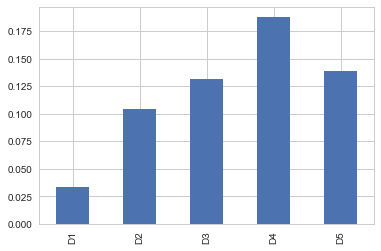

In [100]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

#seaborn setting
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()
##시각화
#bar_plot

((sum_return_T+1).prod()-1).plot(kind='bar')
plt.show()

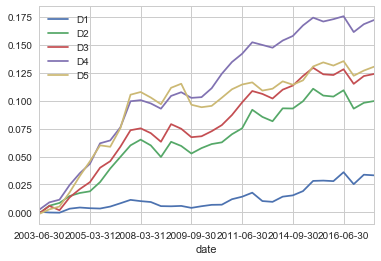

In [101]:
##누적 수익률 곡선
#line plot
log_sum_return_T = np.log(sum_return_T+1)
cum_return_total = pd.DataFrame(index = sum_return_T.index,columns= sum_return_T.columns)
for index in log_sum_return_T.index:
    if index == '2002-09-30':
        cum_return_total.loc[index] = log_sum_return_T.loc['2002-09-30']
    else:
        cum_return_total.loc[index]= (log_sum_return_T.loc[:index]).cumsum().loc[index]
    
cum_return_total.plot(kind='line')

### 시총가중 포트폴리오 performance

In [102]:
##분위별 수익률
sum_return = pd.DataFrame(weighted_portfolio5_df.groupby(['date','decile'])['weighted_return'].sum())
sum_return = sum_return/100
sum_return = sum_return.reset_index()
sum_return.head()

,date,decile,weighted_return
0,2003-06-30,D1,0.006874
1,2003-06-30,D2,-0.002094
2,2003-06-30,D3,-0.001855
3,2003-06-30,D4,0.007098
4,2003-06-30,D5,-0.011897


In [103]:
##portfolio performance
sum_return_T = pd.DataFrame(sum_return.pivot('date','decile','weighted_return'),columns=['D1','D2','D3','D4','D5'])
sum_return_T.head()

,D1,D2,D3,D4,D5
date,,,,,
2003-06-30,0.006874,-0.002094,-0.001855,0.007098,-0.011897
2003-09-30,-0.006386,0.008930,0.011382,0.009100,0.003267
2004-03-31,-0.006580,0.006040,-0.005987,0.007244,0.010115
2004-06-30,0.032810,-0.007461,0.014616,0.017474,0.008992
2004-09-30,0.032332,0.016774,0.004512,0.012571,0.002603


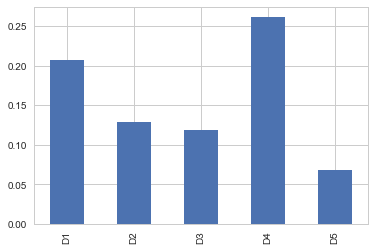

In [104]:
##시각화
#bar_plot

((sum_return_T+1).prod()-1).plot(kind='bar')
plt.show()

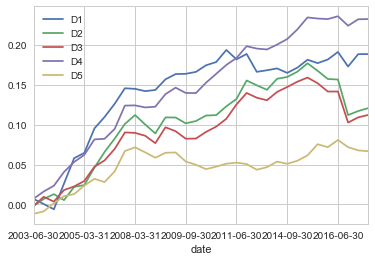

In [105]:
##누적 수익률 곡선
#line plot
log_sum_return_T = np.log(sum_return_T+1)
cum_return_total = pd.DataFrame(index = sum_return_T.index,columns= sum_return_T.columns)
for index in log_sum_return_T.index:
    if index == '2002-09-30':
        cum_return_total.loc[index] = log_sum_return_T.loc['2002-09-30']
    else:
        cum_return_total.loc[index]= (log_sum_return_T.loc[:index]).cumsum().loc[index]
    
cum_return_total.plot(kind='line')

## 10분위

In [106]:
date_list = decile_df['date'].unique()
portfolio10_df = pd.DataFrame()
for date in date_list:
    temp = decile_df[decile_df['date']==date]
    D1 = temp.sort_values(by='E(y)').quantile(0.1)['E(y)']
    D2 = temp.sort_values(by='E(y)').quantile(0.2)['E(y)']
    D3 = temp.sort_values(by='E(y)').quantile(0.3)['E(y)']
    D4 = temp.sort_values(by='E(y)').quantile(0.4)['E(y)']
    D5 = temp.sort_values(by='E(y)').quantile(0.5)['E(y)']
    D6 = temp.sort_values(by='E(y)').quantile(0.6)['E(y)']
    D7 = temp.sort_values(by='E(y)').quantile(0.7)['E(y)']
    D8 = temp.sort_values(by='E(y)').quantile(0.8)['E(y)']
    D9 = temp.sort_values(by='E(y)').quantile(0.9)['E(y)']
    D10 = temp.sort_values(by='E(y)').quantile(1)['E(y)']
   
    
    temp.loc[temp['E(y)']<=D1,'decile'] = 'D1'
    temp.loc[(temp['E(y)']<=D2) & (temp['E(y)']>D1),'decile'] = 'D2'
    temp.loc[(temp['E(y)']<=D3) & (temp['E(y)']>D2),'decile'] = 'D3'
    temp.loc[(temp['E(y)']<=D4) & (temp['E(y)']>D3) ,'decile'] = 'D4'
    temp.loc[(temp['E(y)']<=D5) & (temp['E(y)']>D4) ,'decile'] = 'D5'
    temp.loc[(temp['E(y)']<=D6) & (temp['E(y)']>D5) ,'decile'] = 'D6'
    temp.loc[(temp['E(y)']<=D7) & (temp['E(y)']>D6) ,'decile'] = 'D7'
    temp.loc[(temp['E(y)']<=D8) & (temp['E(y)']>D7) ,'decile'] = 'D8'
    temp.loc[(temp['E(y)']<=D9) & (temp['E(y)']>D8) ,'decile'] = 'D9'
    temp.loc[(temp['E(y)']<=D10) & (temp['E(y)']>D9),'decile'] = 'D10'
    
    portfolio10_df = pd.concat([portfolio10_df,temp])

portfolio10_df.head()

,date,code,return,Y1,E(y),cap,decile
0,2005-09-30,A014820,-1.04,0.000727,0.000048,"228,890",D6
3,2005-09-30,A136490,NaN,NaN,0.000020,NaN,D1
11,2005-09-30,A004890,3.14,0.000153,0.000062,"87,550",D7
14,2005-09-30,A005500,8.58,0.000030,0.000050,"178,200",D6
20,2005-09-30,A100220,NaN,0.000060,0.000029,NaN,D4


In [107]:
##시총가중
def formatting(x):
    if type(x) == 'float':
        return x
    else:
        return float(str(x).replace(',',''))
    
portfolio10_df['cap'] = portfolio10_df['cap'].apply(formatting)
weighted_portfolio10_df = portfolio10_df.copy()
weighted_portfolio10_df['weighted_cap'] = weighted_portfolio10_df.groupby(['date','decile'])['cap'].apply(lambda x: x/np.sum(x))
weighted_portfolio10_df['weighted_return'] = weighted_portfolio10_df['weighted_cap'] * weighted_portfolio10_df['return'] 
weighted_portfolio10_df.head()

,date,code,return,Y1,E(y),cap,decile,weighted_cap,weighted_return
0,2005-09-30,A014820,-1.04,0.000727,0.000048,228890.0,D6,0.045049,-0.046851
3,2005-09-30,A136490,NaN,NaN,0.000020,NaN,D1,NaN,NaN
11,2005-09-30,A004890,3.14,0.000153,0.000062,87550.0,D7,0.011298,0.035475
14,2005-09-30,A005500,8.58,0.000030,0.000050,178200.0,D6,0.035072,0.300921
20,2005-09-30,A100220,NaN,0.000060,0.000029,NaN,D4,NaN,NaN


In [108]:
##동일가중
same_portfolio10_df = portfolio10_df.copy()
same_portfolio10_df['weight_return'] = portfolio10_df.groupby(['date','decile'])['return'].apply(lambda x: x/len(x))
same_portfolio10_df.head()

,date,code,return,Y1,E(y),cap,decile,weight_return
0,2005-09-30,A014820,-1.04,0.000727,0.000048,228890.0,D6,-0.019623
3,2005-09-30,A136490,NaN,NaN,0.000020,NaN,D1,NaN
11,2005-09-30,A004890,3.14,0.000153,0.000062,87550.0,D7,0.060385
14,2005-09-30,A005500,8.58,0.000030,0.000050,178200.0,D6,0.161887
20,2005-09-30,A100220,NaN,0.000060,0.000029,NaN,D4,NaN


### 동일가중 포트폴리오 performance

In [109]:
##분위별 수익률
sum_return = pd.DataFrame(same_portfolio10_df.groupby(['date','decile'])['weight_return'].sum())
sum_return = sum_return/100
sum_return = sum_return.reset_index()
sum_return.head()

,date,decile,weight_return
0,2003-06-30,D1,0.000534
1,2003-06-30,D10,-0.005228
2,2003-06-30,D3,-0.000721
3,2003-06-30,D4,-0.001173
4,2003-06-30,D5,0.001842


In [110]:
##portfolio performance
sum_return_T = pd.DataFrame(sum_return.pivot('date','decile','weight_return'))
sum_return_T['10'] = sum_return_T['D10']
sum_return_T = sum_return_T.drop('D10',axis=1)
sum_return_T.head()

decile,D1,D2,D3,D4,D5,D6,D7,D8,D9,10
date,,,,,,,,,,
2003-06-30,0.000534,NaN,-0.000721,-0.001173,0.001842,-0.003662,0.001694,0.003094,0.002500,-0.005228
2003-09-30,-0.000629,NaN,0.003257,0.009963,0.001609,0.011779,0.003631,0.009530,0.009113,-0.000970
2004-03-31,-0.000156,NaN,0.003323,0.001600,-0.006294,-0.001343,-0.003060,0.007711,0.001370,0.003749
2004-06-30,0.003584,0.00325,0.001108,0.011406,0.008900,0.014206,0.012792,0.013706,0.009430,0.016111
2004-09-30,0.001042,NaN,0.005813,-0.000419,0.005091,0.009808,0.010712,0.010394,0.016885,0.012440


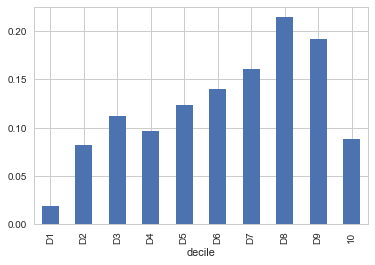

In [111]:
##시각화
#bar_plot

((sum_return_T+1).prod()-1).plot(kind='bar')
plt.show()

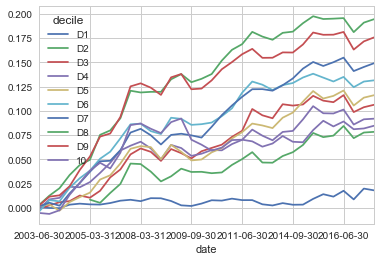

In [112]:
##누적 수익률 곡선
#line plot
log_sum_return_T = np.log(sum_return_T+1)
cum_return_total = pd.DataFrame(index = sum_return_T.index,columns= sum_return_T.columns)
for index in log_sum_return_T.index:
    if index == '2002-09-30':
        cum_return_total.loc[index] = log_sum_return_T.loc['2002-09-30']
    else:
        cum_return_total.loc[index]= (log_sum_return_T.loc[:index]).cumsum().loc[index]
    
cum_return_total.plot(kind='line')

### 시총가중 포트폴리오 performance

In [113]:
##분위별 수익률
sum_return = pd.DataFrame(weighted_portfolio10_df.groupby(['date','decile'])['weighted_return'].sum())
sum_return = sum_return/100
sum_return = sum_return.reset_index()
sum_return.head()

,date,decile,weighted_return
0,2003-06-30,D1,0.006874
1,2003-06-30,D10,-0.012979
2,2003-06-30,D3,-0.001922
3,2003-06-30,D4,-0.002161
4,2003-06-30,D5,0.005126


In [114]:
##portfolio performance
sum_return_T = pd.DataFrame(sum_return.pivot('date','decile','weighted_return'))
sum_return_T['10'] = sum_return_T['D10']
sum_return_T = sum_return_T.drop('D10',axis=1)
sum_return_T.head()

decile,D1,D2,D3,D4,D5,D6,D7,D8,D9,10
date,,,,,,,,,,
2003-06-30,0.006874,NaN,-0.001922,-0.002161,0.005126,-0.005300,0.003689,0.010241,0.000978,-0.012979
2003-09-30,-0.006386,NaN,0.005439,0.010377,0.003932,0.015156,0.004279,0.012970,0.008743,0.002812
2004-03-31,-0.006580,NaN,0.008543,0.004888,-0.007513,-0.005189,-0.003890,0.011196,0.002510,0.010856
2004-06-30,0.033733,0.0065,-0.052324,0.023079,0.014698,0.014574,0.015584,0.018157,0.008078,0.009101
2004-09-30,0.032332,NaN,0.041609,-0.001178,0.007086,0.003021,0.013016,0.012397,-0.009980,0.004012


In [115]:
sum_return_T['long+short'] = (sum_return_T['D8']+sum_return_T['D9'])-(sum_return_T['D1']+sum_return_T['D2']) #10분위는 제외
sum_return_T.head()

decile,D1,D2,D3,D4,D5,D6,D7,D8,D9,10,long+short
date,,,,,,,,,,,
2003-06-30,0.006874,NaN,-0.001922,-0.002161,0.005126,-0.005300,0.003689,0.010241,0.000978,-0.012979,NaN
2003-09-30,-0.006386,NaN,0.005439,0.010377,0.003932,0.015156,0.004279,0.012970,0.008743,0.002812,NaN
2004-03-31,-0.006580,NaN,0.008543,0.004888,-0.007513,-0.005189,-0.003890,0.011196,0.002510,0.010856,NaN
2004-06-30,0.033733,0.0065,-0.052324,0.023079,0.014698,0.014574,0.015584,0.018157,0.008078,0.009101,-0.013998
2004-09-30,0.032332,NaN,0.041609,-0.001178,0.007086,0.003021,0.013016,0.012397,-0.009980,0.004012,NaN


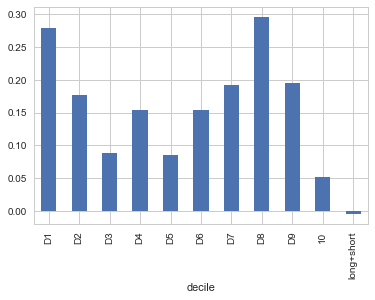

In [116]:
##시각화
#bar_plot

((sum_return_T+1).prod()-1).plot(kind='bar')
plt.show()

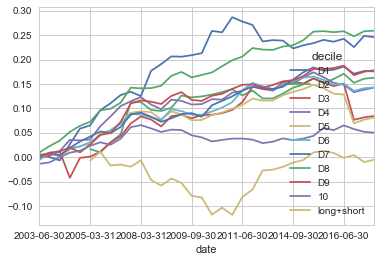

In [117]:
##누적 수익률 곡선
#line plot
log_sum_return_T = np.log(sum_return_T+1)
cum_return_total = pd.DataFrame(index = sum_return_T.index,columns= sum_return_T.columns)
for index in log_sum_return_T.index:
    if index == '2002-09-30':
        cum_return_total.loc[index] = log_sum_return_T.loc['2002-09-30']
    else:
        cum_return_total.loc[index]= (log_sum_return_T.loc[:index]).cumsum().loc[index]
    
cum_return_total.plot(kind='line')

# # 분위 분석
1. 10분위 = 우량주 --> low return?
2. 시총비중 시각화
3. 시총비중과 수익률간의 상관관계?# 


In [158]:
total_code_df = pd.read_csv('fundamental data 1999_2015.csv',engine = 'python')
total_code_df = pd.DataFrame(total_code_df.iloc[8].unique()[1:],index = total_code_df.iloc[7].unique()[1:], columns = ['종목'] )
D10_code_list= portfolio10_df[portfolio10_df['decile']=='D10']['code'].unique()
name_list = []
code_list = []
D10_df = pd.DataFrame()
for i, total in enumerate(total_code_df.index):
    if total in D10_code_list:
        name_list.append(total_code_df.iloc[i].values)
        code_list.append(total)
D10_df['code'] = code_list
D10_df['name'] = name_list
D10_df['name'] = D10_df['name'].apply(lambda x: str(x).replace('[','').replace(']','')).replace("'",'')

In [159]:
#D10_df.to_csv('10분위 분석.csv',encoding='utf-8')
D10_df

,code,name
0,A005930,'삼성전자'
1,A000660,'SK하이닉스'
2,A005380,'현대차'
3,A068270,'셀트리온'
4,A051910,'LG화학'
5,A017670,'SK텔레콤'
6,A012330,'현대모비스'
7,A005490,'POSCO'
8,A051900,'LG생활건강'
9,A035420,'NAVER'


In [160]:
date_list = weighted_portfolio10_df['date'].unique()
sumcap_10_list = []
for date in date_list:
    temp = weighted_portfolio10_df[weighted_portfolio10_df['date']==date]
    #temp['cap'].apply(lambda x: x/np.sum(x))
    #temp['전체시총비중'] = temp['cap'].apply(lambda x: x/np.sum(x))
    temp['전체시총비중'] = temp.groupby('date')['cap'].apply(lambda x: x/np.sum(x))
    sumcap_10_list.append(temp[temp['decile']=='D10']['전체시총비중'].sum())
np.mean(sumcap_10_list)

0.7692491825885159

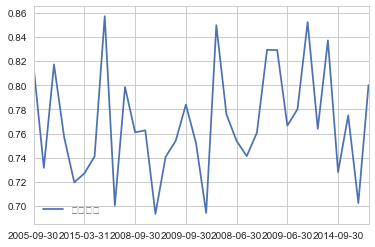

In [161]:
vis = pd.DataFrame(sumcap_10_list,index=date_list,columns=['시총비중'])
vis.plot(kind='line')

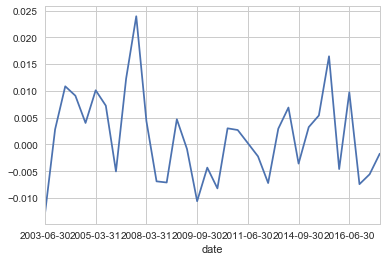

In [163]:
sum_return_T['10'].plot(kind='line')

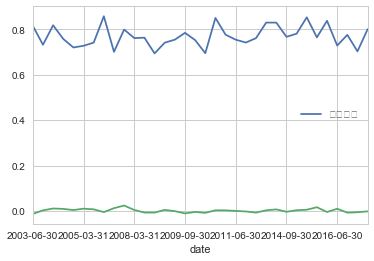

In [164]:
vis.plot(kind='line')
sum_return_T['10'].plot(kind='line')

In [153]:
from scipy.stats import pearsonr

In [165]:
#피어슨 상관계수
pearsonr(sum_return_T['10'].values,sumcap_10_list)

(0.01570902330380067, 0.929735457367317)

In [166]:
corr_df = pd.DataFrame()
corr_df['return'] = sum_return_T['10']
corr_df['weigthed_cap'] = sumcap_10_list
corr = corr_df.corr(method = 'pearson')
corr

,return,weigthed_cap
return,1.000000,0.015709
weigthed_cap,0.015709,1.000000


# # Panel analysis
: average slopes, R^2, Pearson between E(y) and y, rank correlations
- panel A : log(q) x1
- panel B : Cop x2
- panel C : dRoe x3
- panel D: all three variabls x1,x2,x3

In [169]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.datasets import make_regression
import time

In [168]:
Y1_three_df = pd.read_csv('Y1_all_three_beta.csv').set_index('index')
Y1_Cop_df = pd.read_csv('Y1_Cop_beta.csv').set_index('index')
Y1_dRoe_df = pd.read_csv('Y1_dRoe_beta.csv').set_index('index')
Y1_logq_df = pd.read_csv('Y1_log(q)_beta.csv').set_index('index')

Y2_three_df = pd.read_csv('Y2_all_three_beta.csv').set_index('index')
Y2_Cop_df = pd.read_csv('Y2_Cop_beta.csv').set_index('index')
Y2_dRoe_df = pd.read_csv('Y2_dRoe_beta.csv').set_index('index')
Y2_logq_df = pd.read_csv('Y2_log(q)_beta.csv').set_index('index')

Y3_three_df = pd.read_csv('Y3_all_three_beta.csv').set_index('index')
Y3_Cop_df = pd.read_csv('Y3_Cop_beta.csv').set_index('index')
Y3_dRoe_df = pd.read_csv('Y3_dRoe_beta.csv').set_index('index')
Y3_logq_df = pd.read_csv('Y3_log(q)_beta.csv').set_index('index')

Y1_Ey_df = pd.read_csv('최종_y1.csv').drop('Unnamed: 0',axis=1)
Y2_Ey_df = pd.read_csv('최종_y2.csv').drop('Unnamed: 0',axis=1)
Y3_Ey_df = pd.read_csv('최종_y3.csv').drop('Unnamed: 0',axis=1)

- Panel A

In [170]:
Y1_Ey_df[['Y1','E(y)']].corr(method='pearson').iloc[0,1]

0.14450709602431125

In [171]:
panel_A = pd.DataFrame(index=['d1','d2','d3'])
q_list = [Y1_logq_df['X1'].mean(),Y2_logq_df['X1'].mean(),Y3_logq_df['X1'].mean()]
panel_A['logq'] = q_list
panel_A['R^2'] = [ols_to_expected_y(1,1,2).mean(),ols_to_expected_y(1,2,2).mean(),ols_to_expected_y(1,3,2).mean()]

#panel_A.columns = [['panel A','panel A','panel A'],['log(q)','R^2','pearsonr']]
panel_A.columns = [['panel A','panel A'],['log(q)','R^2']]
panel_A

panel A          
      log(q)       R^2
d1  0.003842  0.425269
d2  0.008681  0.450290
d3  0.014423  0.452184

- Panel B

In [68]:
panel_B = pd.DataFrame(index=['d1','d2','d3'])
q_list = [Y1_Cop_df['X2'].mean(),Y2_Cop_df['X2'].mean(),Y3_Cop_df['X2'].mean()]
panel_B['Cop'] = q_list
panel_B['R^2'] = [ols_to_expected_y(2,1,2).mean(),ols_to_expected_y(2,2,2).mean(),ols_to_expected_y(2,3,2).mean()]
panel_B.columns = [['panel B','panel B'],['Cop','R^2']]
panel_B

panel B          
         Cop       R^2
d1  1.132831  0.411338
d2  2.513890  0.390250
d3  4.178618  0.366454

- Panel C

In [69]:
panel_C = pd.DataFrame(index=['d1','d2','d3'])
q_list = [Y1_dRoe_df ['X3'].mean(),Y2_dRoe_df ['X3'].mean(),Y3_dRoe_df ['X3'].mean()]
panel_C['dRoe'] = q_list
panel_C['R^2'] = [ols_to_expected_y(3,1,2).mean(),ols_to_expected_y(3,2,2).mean(),ols_to_expected_y(3,3,2).mean()]
panel_C.columns = [['panel C','panel C'],['dRoe','R^2']]
panel_C

panel C          
             dRoe       R^2
d1  -23243.873916  0.002131
d2 -415621.026521  0.002343
d3 -732526.659975  0.003002

- Panel D

In [172]:
panel_D = pd.DataFrame(index=['d1','d2','d3'])
q_list = [Y1_three_df ['X1'].mean(),Y2_three_df ['X1'].mean(),Y3_three_df ['X1'].mean()]
cop_list = [Y1_three_df ['X2'].mean(),Y2_three_df ['X2'].mean(),Y3_three_df ['X2'].mean()]
dRoe_list = [Y1_three_df ['X3'].mean(),Y2_three_df ['X3'].mean(),Y3_three_df ['X3'].mean()]
panel_D['logq'] = q_list
panel_D['Cop'] = cop_list
panel_D['dRoe'] = dRoe_list
panel_D['R^2'] = [ols_to_expected_y(4,1,2).mean(),ols_to_expected_y(4,2,2).mean(),ols_to_expected_y(4,3,2).mean()]

corr_y1 = Y1_Ey_df[['Y1','E(y)']].corr(method='pearson').iloc[0,1]
corr_y2 = Y2_Ey_df[['Y3','E(y)']].corr(method='pearson').iloc[0,1]
corr_y3 = Y3_Ey_df[['Y3','E(y)']].corr(method='pearson').iloc[0,1]
panel_D['Pearson'] =[corr_y1,corr_y2,corr_y3]
panel_D.columns = [['panel D','panel D','panel D','panel D','paneD'],['logq','Cop','dRoe','R^2','Pearson']]
panel_D

panel D                                        paneD
        logq       Cop           dRoe       R^2   Pearson
d1  0.002734  0.402662  -15106.781913  0.458606  0.144507
d2  0.007105  0.559983 -443516.611924  0.474251  0.119355
d3  0.012601  0.618854 -674125.581383  0.468666  0.134947